In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# prompt: Load a csv dataset

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/mall_customer_dataset/Mall_Customers.csv')

# Display the first few rows of the dataframe
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Explore the dataset
print("Display data type of each column")
print(df.dtypes)

print("generate summary statistics")
print(df.describe(include='all'))

print("check for missing values in each column")
print(df.isnull().sum())

print("display unique counts for each column")
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].nunique()}")

Display data type of each column
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
generate summary statistics
        CustomerID   Genre         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spendin

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID       Genre           Age  Annual Income (k$)  \
count  200.000000  200.000000  2.000000e+02        2.000000e+02   
mean   100.500000    0.440000 -1.021405e-16       -2.131628e-16   
std     57.879185    0.497633  1.002509e+00        1.002509e+00   
min      1.000000    0.000000 -1.496335e+00       -1.738999e+00   
25%     50.750000    0.000000 -7.248436e-01       -7.275093e-01   
50%    100.500000    0.000000 -2.045351e-01        3.587926e-02   
75%    150.250000    1.000000  7.284319e-01        6.656748e-01   
max    200.000000    1.000000  2.235532e+00        2.917671e+00   

       Spending Score (1-100)  
count            2.000000e+02  
mean            -1.465494e-16  
std              1.002509e+00  
min             -1.910021e+00  
25%             -5.997931e-01  
50%             -7.764312e-03  
75%              8.

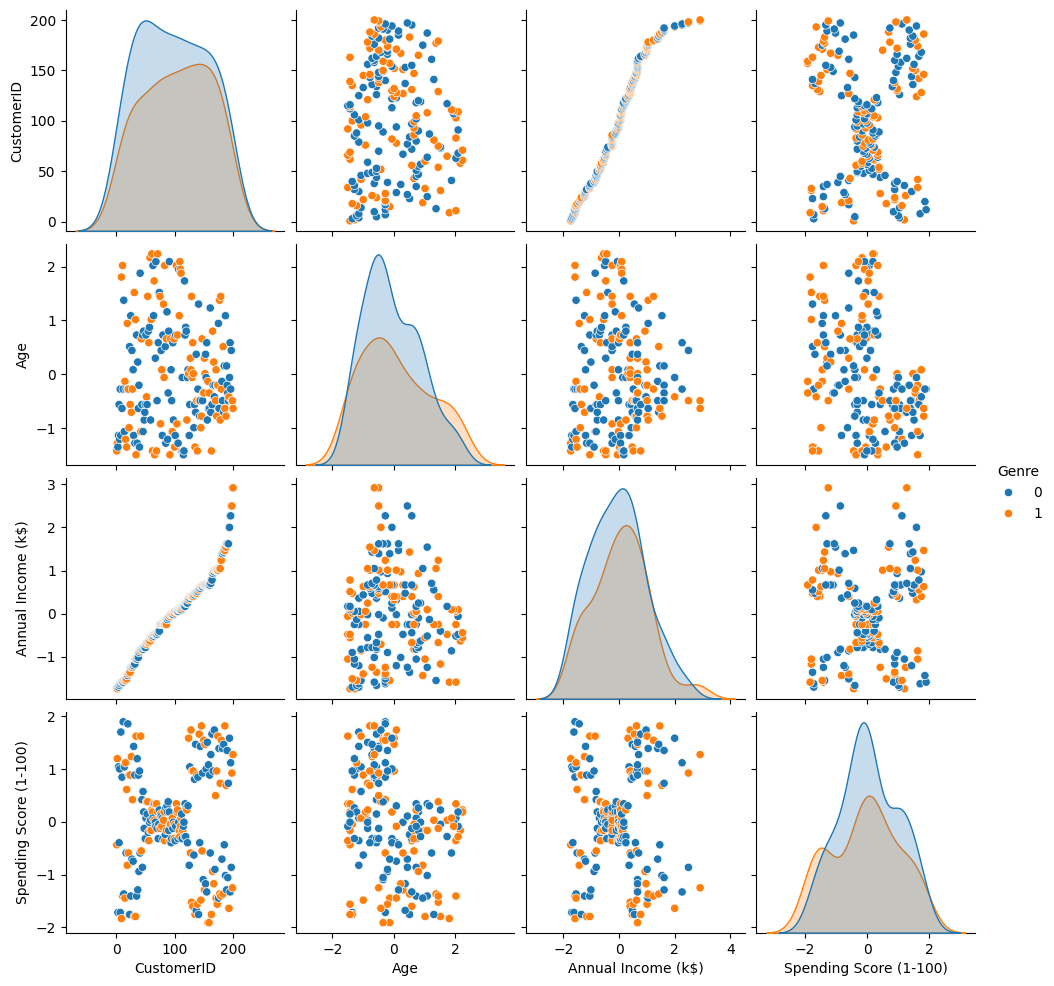

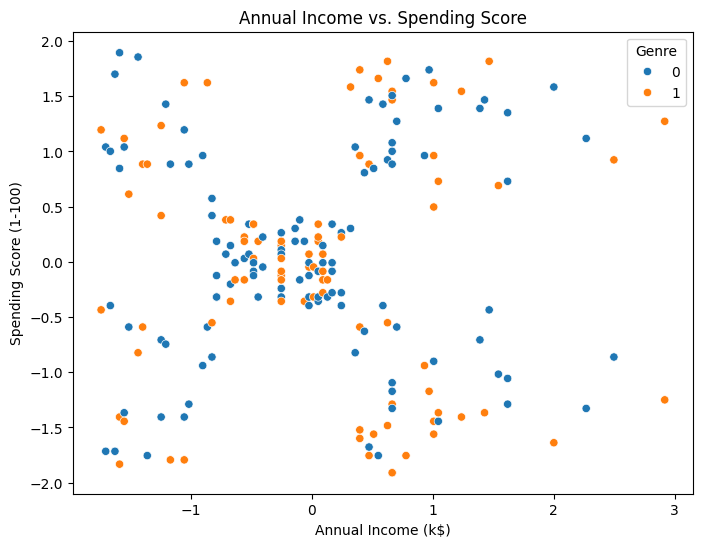

In [ ]:
# prompt: Check for missing values, View summary statistics,
# Understand the relationships between variables.  above dataset

# Check for missing values
print(df.isnull().sum())

# View summary statistics
print(df.describe(include='all'))

# Pairplot to visualize relationships between pairs of variables
sns.pairplot(df, hue='Genre')  # Assuming 'Genre' is a categorical variable
plt.show()


# Analyze relationships between specific variables
# Example: Relationship between Annual Income and Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Genre')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Handle missing data (if any) - In this case, no missing values were found in the previous execution
# but it's good practice to include this step.
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col].fillna(df[col].mode()[0], inplace=True) #Fill with mode
    else:
        df[col] = df[col].fillna(df[col].mean())  #Fill with mean (Corrected line)


# Encode categorical variables (Gender)
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

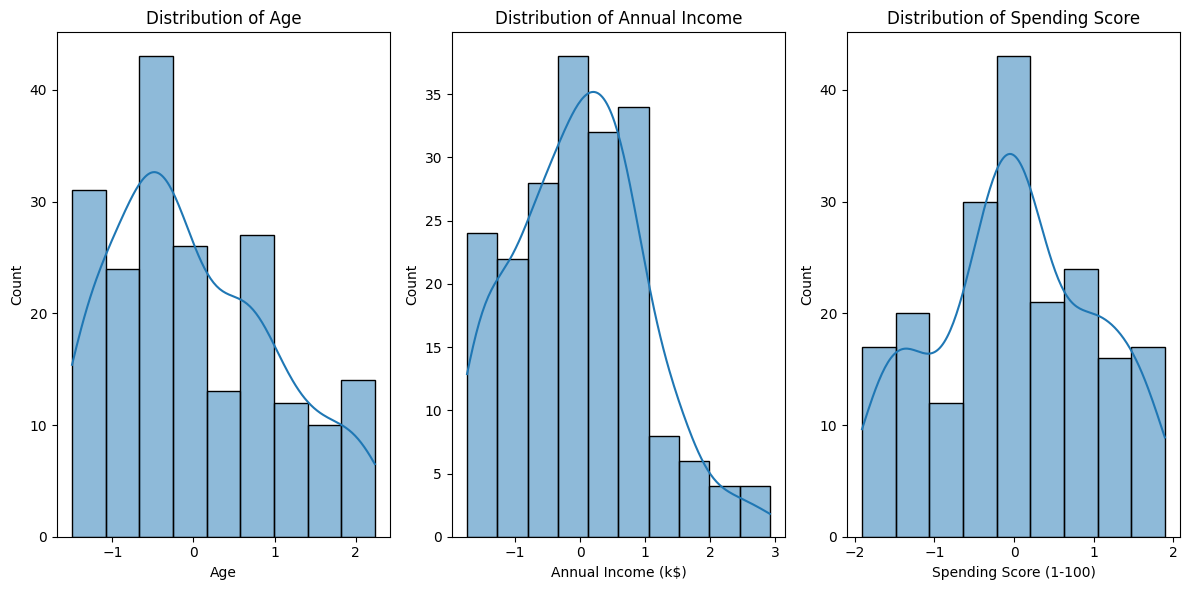

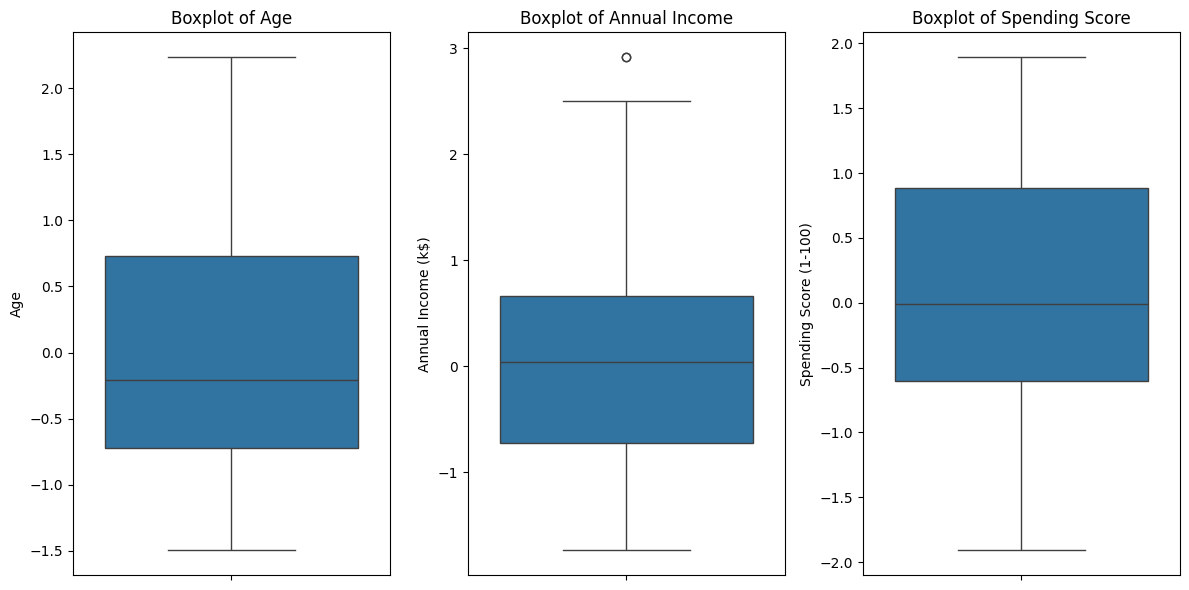

In [ ]:
# prompt: Plot relationships and distributions.
# Use scatter plots, histograms, and pair plots.

# Histograms for numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

# Boxplots to visualize distributions and identify outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')

plt.tight_layout()
plt.show()

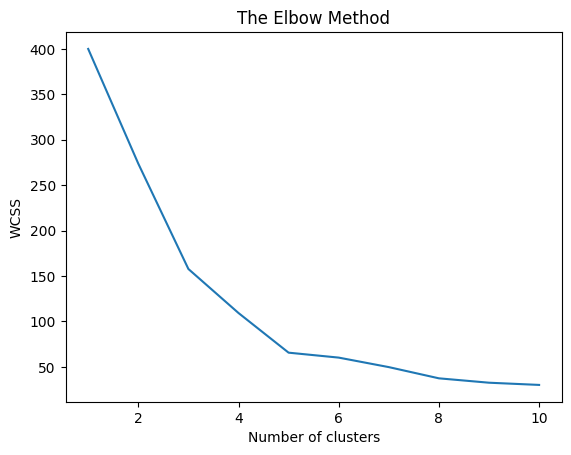

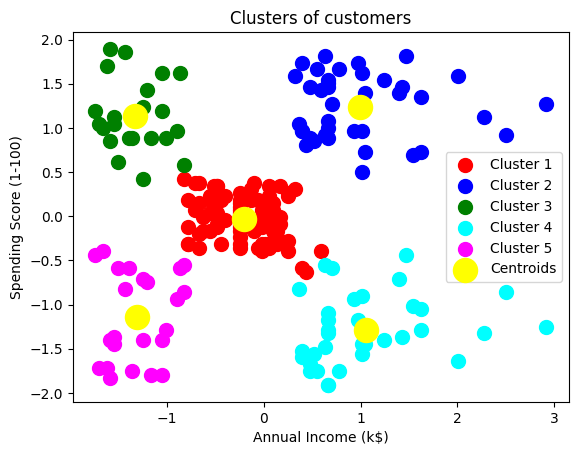

In [ ]:
# prompt: Use K-Means clustering algorithms

# Feature scaling
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, [3, 4]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Applying k-means to the mall dataset
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means to the mall dataset (with optimal number of clusters)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Number of customers in each cluster:
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


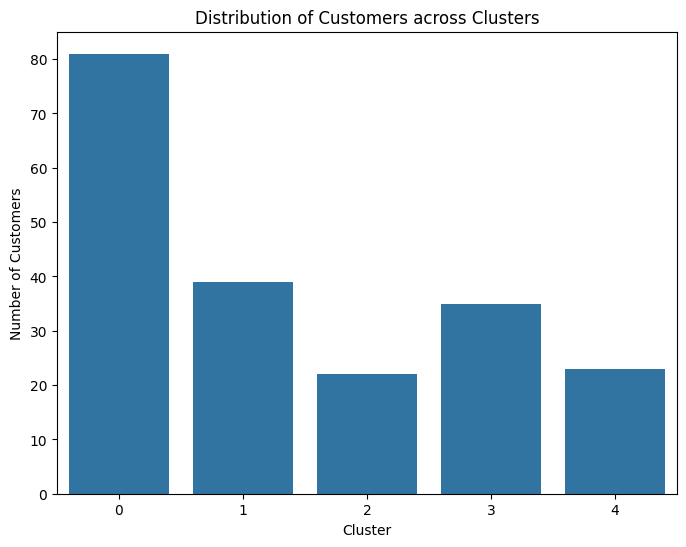

Cluster 1:
       CustomerID      Genre        Age  Annual Income (k$)  \
count   81.000000  81.000000  81.000000           81.000000   
mean    86.320988   0.407407   0.277454           -0.200913   
std     24.240889   0.494413   1.180406            0.343071   
min     44.000000   0.000000  -1.496335           -0.822933   
25%     66.000000   0.000000  -0.850435           -0.479408   
50%     86.000000   0.000000   0.513132           -0.250391   
75%    106.000000   1.000000   1.087265            0.054964   
max    143.000000   1.000000   2.235532            0.589336   

       Spending Score (1-100)  
count               81.000000  
mean                -0.026456  
std                  0.253540  
min                 -0.628909  
25%                 -0.240694  
50%                 -0.007764  
75%                  0.186343  
max                  0.419273  
Cluster 2:
       CustomerID      Genre        Age  Annual Income (k$)  \
count   39.000000  39.000000  39.000000           39.000000

In [ ]:
# prompt: Visualize the clusters in a 2D or 3D space.
# Assess the distribution of customers in each cluster.

# Analyze the distribution of customers in each cluster
cluster_counts = pd.Series(y_kmeans).value_counts()
print("Number of customers in each cluster:")
print(cluster_counts)

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Distribution of Customers across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# You can further analyze the characteristics of customers within each cluster
# by examining the mean/median values of other features for each cluster.
for i in range(5):  # Assuming 5 clusters
    cluster_data = df[y_kmeans == i]
    print(f"Cluster {i+1}:")
    print(cluster_data.describe())

In [ ]:
# prompt: Use insights from the clusters to make business decisions:
# Personalized marketing campaigns.
# Customer retention strategies.
# Identify high-value customers.

# Add cluster labels to the original DataFrame
df['Cluster'] = y_kmeans

# Analyze clusters for business decisions
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nAnalysis for Cluster {i+1}:")

    # 1. Personalized Marketing Campaigns
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    print(f"  - Average Income: {avg_income:.2f}k$")
    print(f"  - Average Spending Score: {avg_spending:.2f}")
    # Example: Target cluster 1 with luxury goods ads, cluster 4 with budget-friendly promotions
    if i == 1:  #Example for Cluster 2
      print("  - Marketing Strategy: Target with luxury goods and premium services.")
    elif i == 4:
      print("  - Marketing Strategy: Offer discounts and promotions, focus on value")

    # 2. Customer Retention Strategies
    # Examine age, income, spending score to identify potential churn risks
    avg_age = cluster_data['Age'].mean()
    print(f"  - Average Age: {avg_age:.0f}")
    # Example: Customers in a specific age range might need different retention strategies
    if avg_age < 30:
        print("  - Retention Strategy: Focus on building relationships and community engagement.")
    else:
        print("  - Retention Strategy: Offer loyalty programs and personalized recommendations.")

    # 3. Identify High-Value Customers
    # Clusters with high income and spending scores are likely high-value
    if avg_income > 60 and avg_spending > 80:  #Example criteria
        print(f"  - High-Value Customer Segment: This cluster represents high-value customers. Prioritize premium service and loyalty programs.")


Analysis for Cluster 1:
  - Average Income: -0.20k$
  - Average Spending Score: -0.03
  - Average Age: 0
  - Retention Strategy: Focus on building relationships and community engagement.

Analysis for Cluster 2:
  - Average Income: 0.99k$
  - Average Spending Score: 1.24
  - Marketing Strategy: Target with luxury goods and premium services.
  - Average Age: -0
  - Retention Strategy: Focus on building relationships and community engagement.

Analysis for Cluster 3:
  - Average Income: -1.33k$
  - Average Spending Score: 1.13
  - Average Age: -1
  - Retention Strategy: Focus on building relationships and community engagement.

Analysis for Cluster 4:
  - Average Income: 1.06k$
  - Average Spending Score: -1.28
  - Average Age: 0
  - Retention Strategy: Focus on building relationships and community engagement.

Analysis for Cluster 5:
  - Average Income: -1.31k$
  - Average Spending Score: -1.14
  - Marketing Strategy: Offer discounts and promotions, focus on value
  - Average Age: 0
  

In [33]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5546571631111091
